Plotação de gráficos pra análise de Outliers

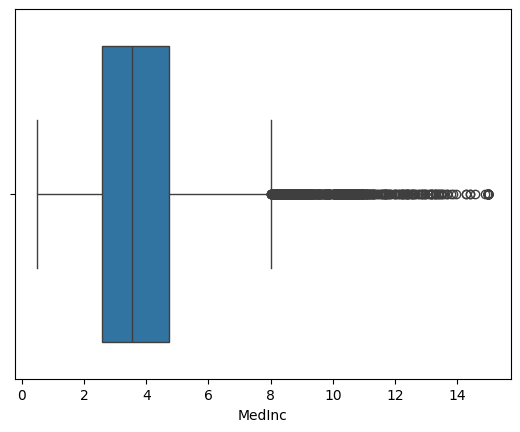

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame

coluna = "MedInc"
dados = df[coluna]



sns.boxplot(x=df[coluna])
plt.show()


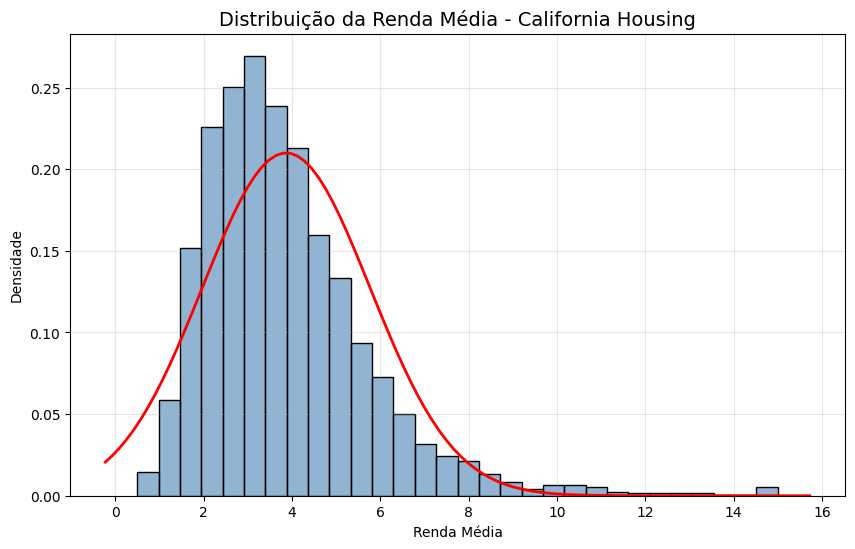

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

media = df['MedInc'].mean()
std = df['MedInc'].std()

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='MedInc', bins=30, stat='density',
             color='steelblue', alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, std)

plt.plot(x, p, 'r', linewidth=2)

plt.title('Distribuição da Renda Média - California Housing', fontsize=14)
plt.xlabel('Renda Média')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)
plt.show()

## Usando Interquartil (IQR)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


Q1 = df[coluna].quantile(0.25)
Q3 = df[coluna].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR # Limite inferior
upper_bound = Q3 + 1.5 * IQR # Limite superior

outliers = df[(df[coluna] < lower_bound) |
 (df[coluna] > upper_bound)]

print(f"Outliers em MedInc: {len(outliers)}")
print(f"Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")

Outliers em MedInc: 681
Limites: [-0.71, 8.01]


## Usando Desvio padrão

In [15]:
media = df[coluna].mean()
std = df[coluna].std()

z_scores = (df[coluna] - media) / std

outliers = df[np.abs(z_scores) > 3]

print(f"Quantidade de outliers usando Desvio padrão: {len(outliers)}")

Quantidade de outliers usando Desvio padrão: 345


Nesse caso, o desvio padrão é mais indicado já que a distribuição é assimétrica
